# CREDIT CARD FRAUD DETECTION

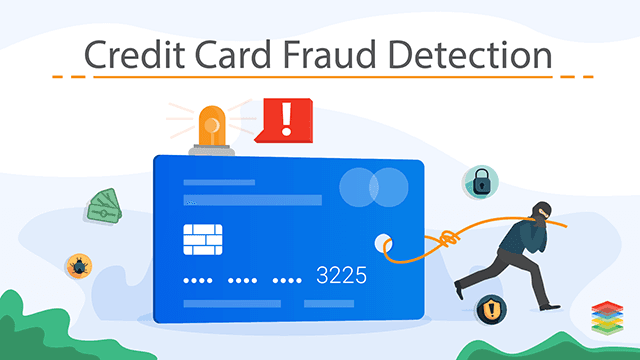

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data['Class'].unique()

array([0, 1], dtype=int64)

In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
# Data Preprocessing
X = data.drop('Class', axis=1)
y = data['Class']

In [11]:
# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [12]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [14]:
# Random Undersampling to balance class distribution
fraud_indices = np.where(y_train == 1)[0]
random_indices = np.random.choice(np.where(y_train == 0)[0], size=len(fraud_indices), replace=False)
undersampled_indices = np.concatenate((fraud_indices, random_indices))
X_train_undersampled = X_train[undersampled_indices]
y_train_undersampled = y_train.iloc[undersampled_indices]

In [15]:
# Model Training - Logistic Regression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_undersampled, y_train_undersampled)

LogisticRegression(random_state=42)

In [16]:
# Model Training - Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_undersampled, y_train_undersampled)

RandomForestClassifier(random_state=42)

In [17]:
# Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [18]:
print("Logistic Regression:")
evaluate_model(model_lr, X_test, y_test)

print("\nRandom Forest:")
evaluate_model(model_rf, X_test, y_test)

Logistic Regression:
Confusion Matrix:
 [[54912  1952]
 [    7    91]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.93      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.97      0.98     56962


Random Forest:
Confusion Matrix:
 [[55208  1656]
 [    8    90]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [19]:
# Data Visualization
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.xticks([0, 1], ['Genuine', 'Fraudulent'])
    plt.yticks([0, 1], ['Genuine', 'Fraudulent'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

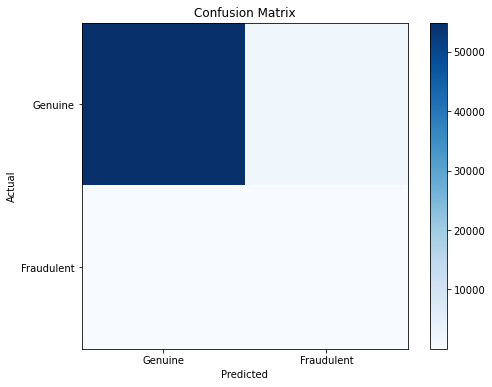

In [20]:
# Plot Confusion Matrix for Logistic Regression
plot_confusion_matrix(confusion_matrix(y_test, model_lr.predict(X_test)))

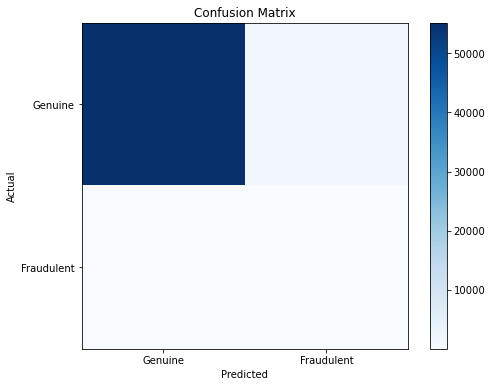

In [21]:
# Plot Confusion Matrix for Random Forest
plot_confusion_matrix(confusion_matrix(y_test, model_rf.predict(X_test)))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


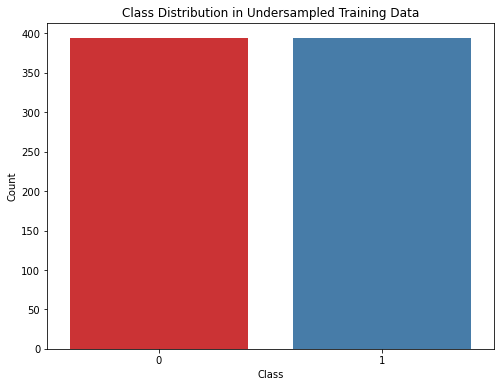

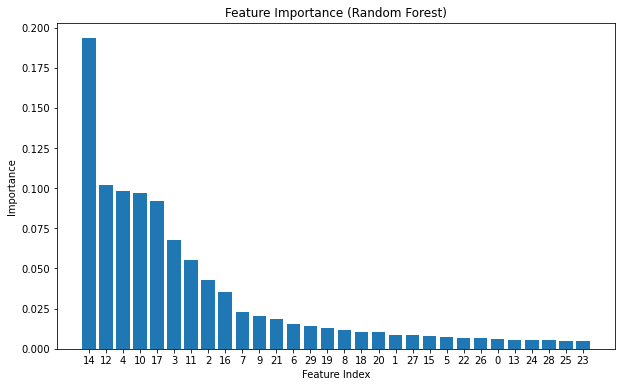

In [22]:
import seaborn as sns

# Visualize Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(y_train_undersampled, palette='Set1')
plt.title("Class Distribution in Undersampled Training Data")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Visualize Feature Importance (for Random Forest)
feature_importances = model_rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train_undersampled.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X_train_undersampled.shape[1]), sorted_indices)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


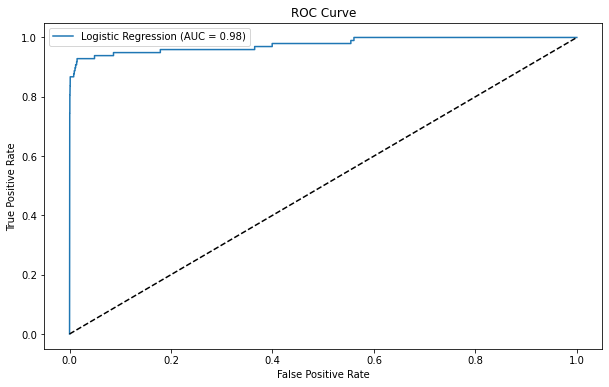

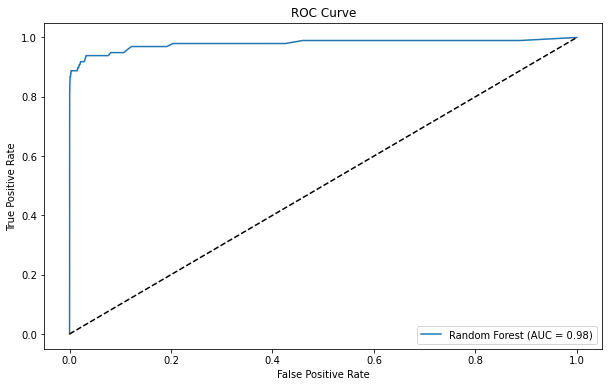

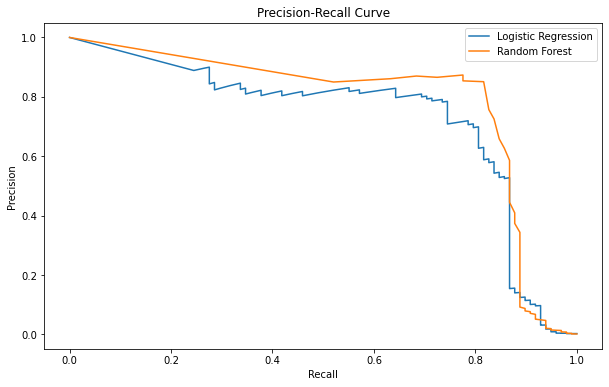

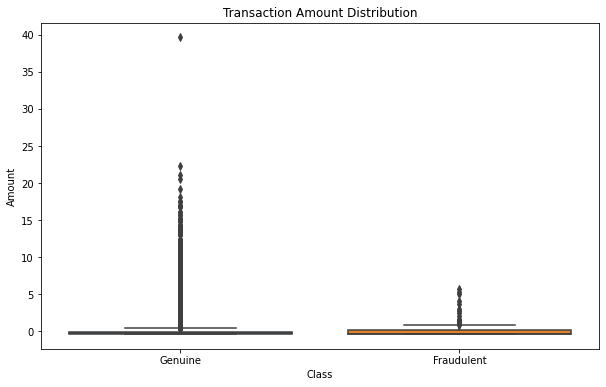

In [23]:
# Visualize ROC Curve and AUC (for Logistic Regression)
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(10, 6))
y_pred_prob_lr = model_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
auc_lr = roc_auc_score(y_test, y_pred_prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Visualize ROC Curve and AUC (for Random Forest)
plt.figure(figsize=(10, 6))
y_pred_prob_rf = model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Visualize Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 6))
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_prob_lr)
plt.plot(recall_lr, precision_lr, label='Logistic Regression')
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_prob_rf)
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

# Visualize Box Plot of Transaction Amounts for Genuine and Fraudulent Transactions
plt.figure(figsize=(10, 6))
sns.boxplot(x=y_test, y=X_test[:, -1])  # Amount column
plt.title("Transaction Amount Distribution")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.xticks([0, 1], ['Genuine', 'Fraudulent'])
plt.show()
